
# Notebook para explorar alguns recursos da biblioteca `statsmodels`

In [1]:
import numpy as np
import pickle
#import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

import warnings
warnings.filterwarnings('ignore')

## Análise de séries temporais geradas por modelos da família ARMA ##

Vamos começar definindo alguns polinômios para gerar algumas séries temporais:

$$A(q) = 1 - 1.5q^{-1} + 0.7q^{-2}$$

$$C(q) = 0.5 - 0.5q^{-1}$$

In [2]:
ar1 = np.convolve([1, -1.5, 0.7],[1])
ma1 = 0.5*np.array([1, 1])

np.random.seed(12345)
# ruído branco
epsilon = arma_generate_sample(1, [1, 0], 10000)

Comecemos por uma série temporal gerada por um modelo de média móvel (**MA**). A seguir são apresentados as primeiras 50 amostras da série, sua funções de auto-correlação (ACF e P-ACF).

ACF:

$$r_{xx}(l) = \sum_i x_{i} x_{i-l}$$

A função de autocorrelação parcial (P-ACF) pode ser vista como a ACF, descontados os efeitos de $l$ instantes/amostras anteriores. Para mais detalhes de como calcular a P-ACF visite: [Understanding the PACF](https://towardsdatascience.com/understanding-partial-auto-correlation-fa39271146ac).


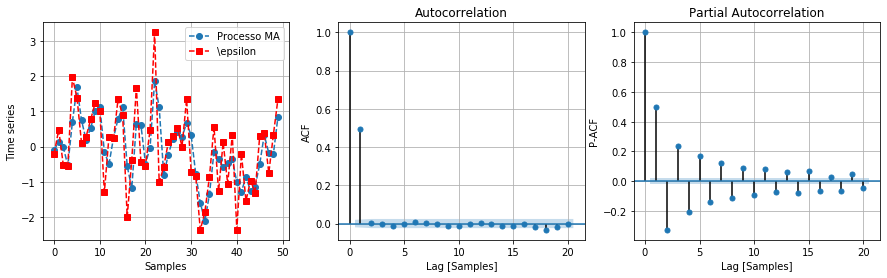

In [5]:
np.random.seed(12345)
y1 = arma_generate_sample(1, ma1, 10000)

plt.figure(figsize=[15, 4])
ax1 = plt.subplot(1,3,1)
ax1.set_xlabel('Samples')
ax1.set_ylabel('Time series')
ax1.plot(y1[:50],'o--',label='Processo MA'), plt.grid()
ax1.plot(epsilon[:50],'rs--',label='\epsilon')
ax1.legend()

ax2 = plt.subplot(1,3,2)
ax2.set_xlabel('Lag [Samples]')
ax2.set_ylabel('ACF')
plot_acf(y1,ax=ax2,lags=20)
ax2.grid()

ax3 = plt.subplot(1,3,3)
ax3.set_xlabel('Lag [Samples]')
ax3.set_ylabel('P-ACF')
plot_pacf(y1,ax=ax3,lags=20)
ax3.grid()
plt.show()


Em seguida, analisaremos uma série temporal gerada por um modelo auto-regressivo (**AR**). Observe as diferenças entre as funções de correlação dos processos **MA** e **AR**.

Para processos **AR**, a P-ACF *ideal* tende a zero após um atraso $l$ igual à ordem da regressão. Portanto, a função de autocorrelação parcial é particularmente útil para indicar a ordem de modelos **AR**.

[Referência adicional sobre a interpretação da P-ACF](https://online.stat.psu.edu/stat510/lesson/2/2.2)

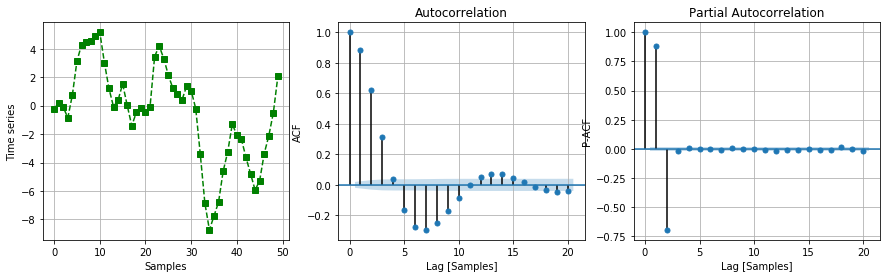

In [6]:
np.random.seed(12345)
y2 = arma_generate_sample(ar1, np.array([1, 0]), 10000)

plt.figure(figsize=[15, 4])
ax1 = plt.subplot(1,3,1)
ax1.set_xlabel('Samples')
ax1.set_ylabel('Time series')
ax1.plot(y2[:50],'gs--'), plt.grid()

ax2 = plt.subplot(1,3,2)
ax2.set_xlabel('Lag [Samples]')
ax2.set_ylabel('ACF')
plot_acf(y2,ax=ax2,lags=20)
ax2.grid()

ax3 = plt.subplot(1,3,3)
ax3.set_xlabel('Lag [Samples]')
ax3.set_ylabel('P-ACF')
plot_pacf(y2,ax=ax3,lags=20)
ax3.grid()
plt.show()


A variável `y3` é obtida sa saída de um modelo **ARMA**, que combina os processo **MA** e **AR** abordados anteriormente. Note que o termo auto-regressivo é dominante. 

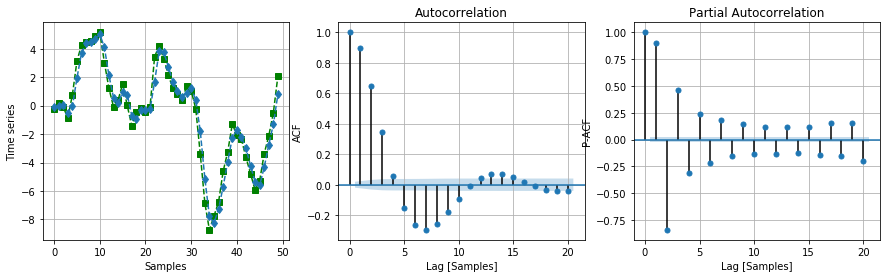

In [7]:
np.random.seed(12345)
y3 = arma_generate_sample(ar1, ma1, 10000)

plt.figure(figsize=[15, 4])
ax1 = plt.subplot(1,3,1)
ax1.set_xlabel('Samples')
ax1.set_ylabel('Time series')
ax1.plot(y2[:50],'gs--'),
ax1.plot(y3[:50],'d--'), plt.grid()

ax2 = plt.subplot(1,3,2)
ax2.set_xlabel('Lag [Samples]')
ax2.set_ylabel('ACF')
plot_acf(y3,ax=ax2,lags=20)
ax2.grid()

ax3 = plt.subplot(1,3,3)
ax3.set_xlabel('Lag [Samples]')
ax3.set_ylabel('P-ACF')
plot_pacf(y3,ax=ax3,lags=20)
ax3.grid()
plt.show()

## Estimação dos parâmetros do modelo ARMA ##

Podemos usar a função `ARIMA` para calcular os coeficientes de modelos para representar as séries temporais `y1`, `y2` e `y3` geradas anteriormente. Suponha que não conhecemos os polinômios dos modelos usados para gerar os dados. É natural que surjam as os questionamentos:
 - Que ordem `(n_a, n_i, n_c)` devo adotar?
 - Como saber se o modelo estimado captura a informação disponível em cada série temporal?
 
 Utilize o código das duas próximas células, altere a ordem do modelo e inspecione os resultados obtidos. O que se pode observar?

In [12]:
y = y3[:1000]
arma_m = ARIMA(y, order=(2, 0, 1))#, trend='n')
arma_res = arma_m.fit()
print(arma_res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -710.443
Date:                Mon, 03 May 2021   AIC                           1430.885
Time:                        10:55:21   BIC                           1455.424
Sample:                             0   HQIC                          1440.212
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0111      0.156     -0.071      0.943      -0.317       0.295
ar.L1          1.4896      0.024     62.933      0.000       1.443       1.536
ar.L2         -0.6895      0.024    -29.124      0.0

**Avaliação dos resultados**

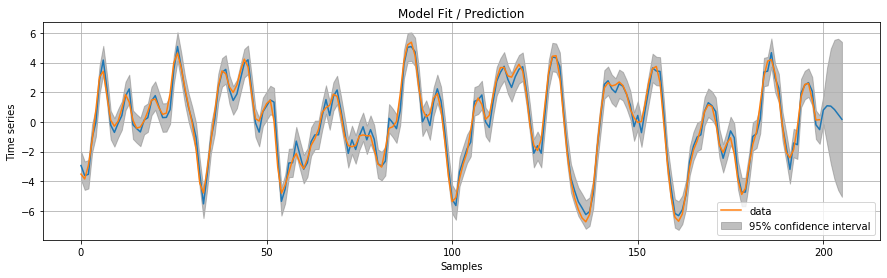

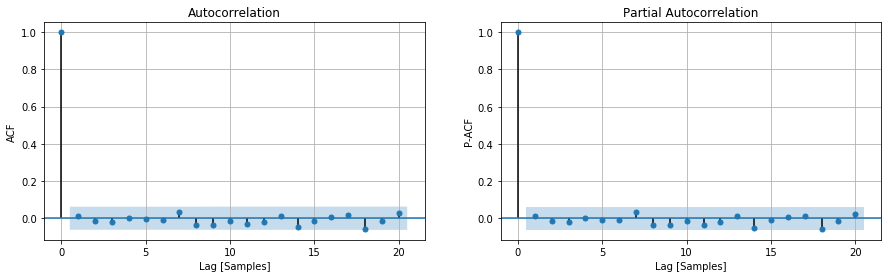

In [13]:
fig, ax = plt.subplots(1, 1, figsize=[15, 4])
plt.title('Model Fit / Prediction')
plt.xlabel('Samples')
plt.ylabel('Time series')
i1,i2 = 800, 1005
plot_predict(arma_res,start=i1, end=i2, ax=ax)
plt.plot(y[i1:i2],label='data')
#plt.plot(arma_res.predict(i1, i2),'r.--',label='prediction')
legend = plt.legend()
plt.grid()

plt.figure(figsize=[15, 4])
resid = arma_res.resid
ax2 = plt.subplot(1,2,1)
ax2.set_xlabel('Lag [Samples]')
ax2.set_ylabel('ACF')
plot_acf(resid,ax=ax2,lags=20)
ax2.grid()

ax3 = plt.subplot(1,2,2)
ax3.set_xlabel('Lag [Samples]')
ax3.set_ylabel('P-ACF')
plot_pacf(resid,ax=ax3,lags=20)
ax3.grid()
plt.show()

### Exercício ###

Tente modelar a série temporal salva em `y4.pkl`.

In [14]:
y4 = np.load("y4.pkl",allow_pickle=True)
y_ = y4